# 2023 Data Analysis

In [1]:
import seaborn as sns
sns.set()
sns.set_palette("Dark2")

# automatically reload utils module when it changes
%load_ext autoreload
%autoreload 2

# import utility functions
import sys
sys.path.append('../')
from src.utils import *

# set plotting defaults
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

# requires version 0.12.0 or higher
sns.__version__

'0.12.2'

In [2]:
# load the 2023 data
df = get_data(2023)

Breakdown by Outlier Condition:
	Outlier Rents: 5461 (30%)
	Outlier Increase vs Base: 608 ( 3%)
	Outlier Increase vs Previous: 328 ( 2%)
	Overall: 5905 (33%)

Breakdown by Subset:
	5905 outliers (33%)
	12081 non-outliers (67%)


	8567 rent increase (48%)
	9419 no rent increase (52%)


	7146 exempt (40%)
	10840 not exempt (60%)


# Population Statistics

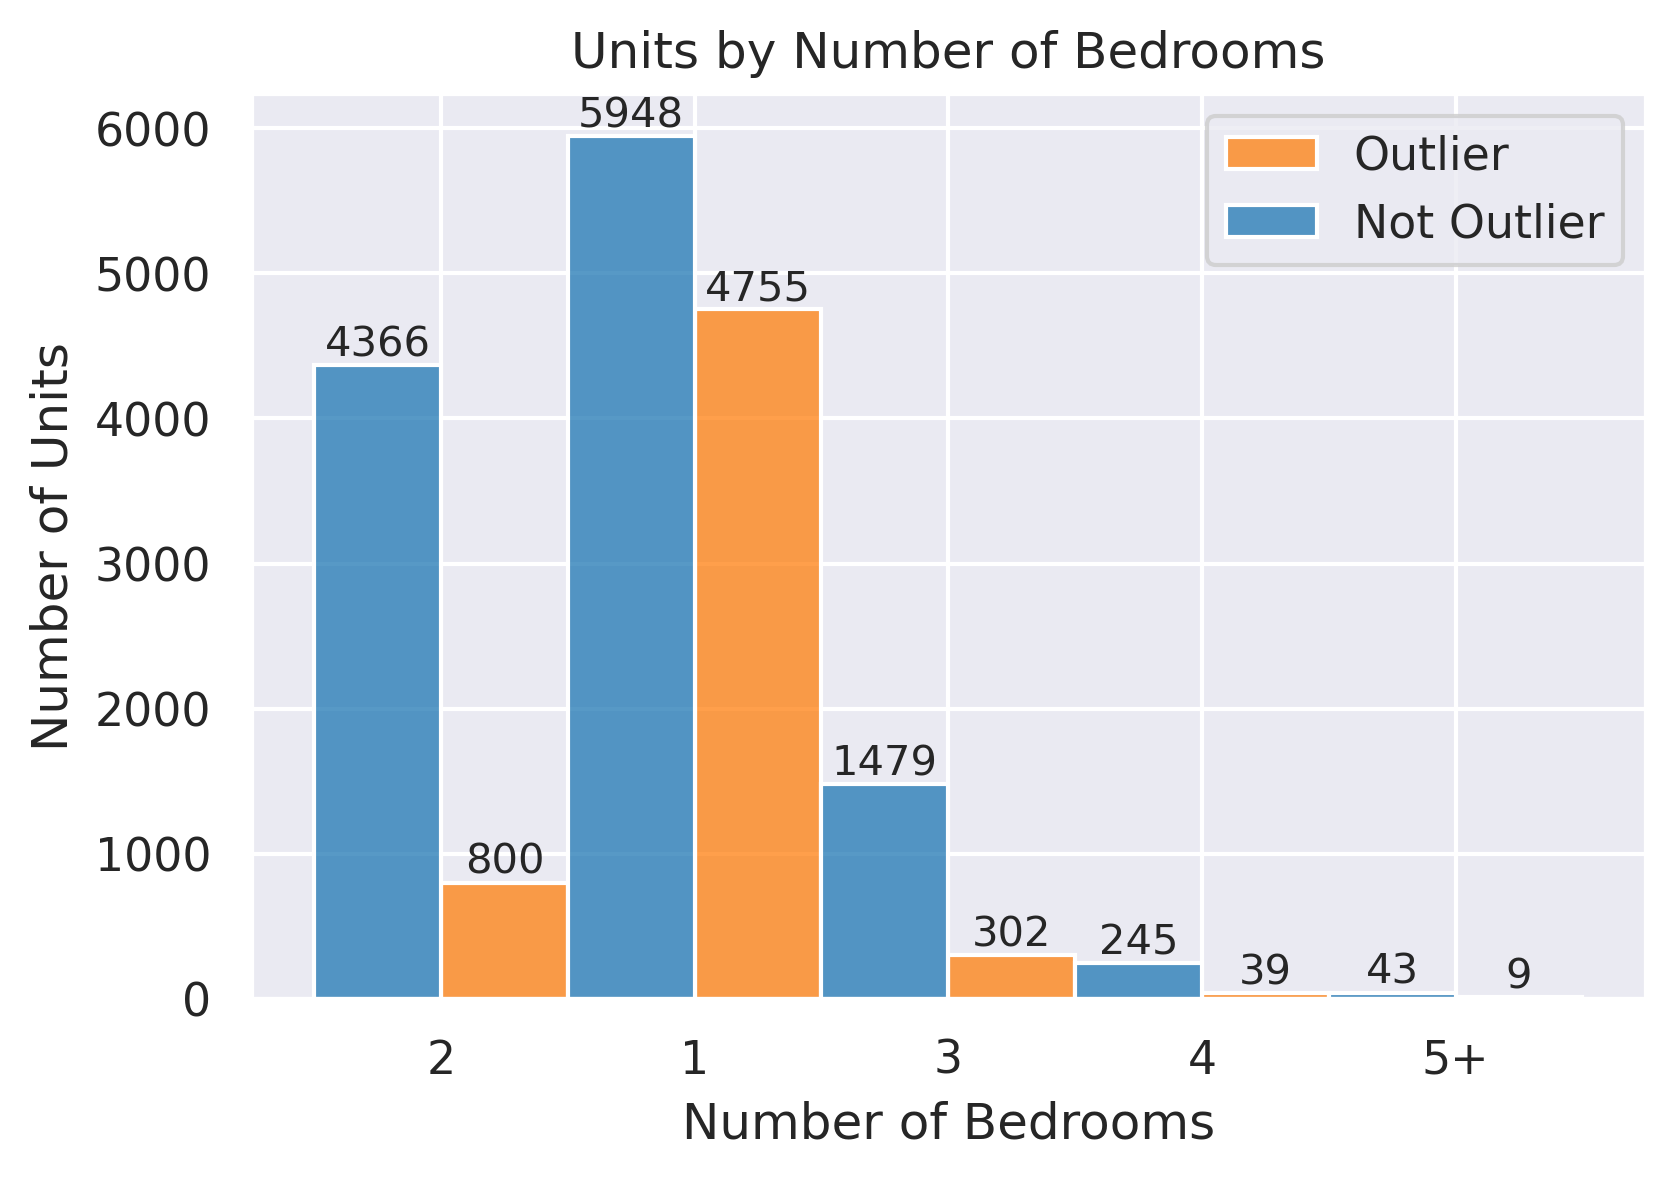

In [3]:
ax = sns.histplot(
    data=df,
    x='nbrBedRms_grouped',
    hue='outlier',
    multiple='dodge',
    palette='tab10',
    )
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='%d',
        label_type='edge'
        )
ax.set_title("Units by Number of Bedrooms")
ax.set_xlabel("Number of Bedrooms")
ax.set_ylabel("Number of Units")
ax.legend(labels=['Outlier', 'Not Outlier'])

In [4]:
# outlier counts by number of bedrooms
tab = pd.crosstab(
    df['nbrBedRms_grouped'],
    df['outlier'],
    margins=True,
    margins_name='Total'
    )
tab.columns = ['Not Outlier', 'Outlier', 'Total']
tab.index.name = 'Number of Bedrooms'
tab

,Not Outlier,Outlier,Total
Number of Bedrooms,,,
1,5948,4755,10703
2,4366,800,5166
3,1479,302,1781
4,245,39,284
5+,43,9,52
Total,12081,5905,17986


## Essential Statistics

These are statistics requested by the Press Herald.

In [5]:
# essential statistics
median_rent = df[~df["outlier"]]['CurrentRent1'].median()
mean_rent_inc = df[~df["outlier"]]['Rent_Inc'].mean()
mean_rent_inc_percent = df[~df["outlier"]]['Rent_Inc_percent'].mean()
median_1br_rent = df[~df["outlier"]][df['nbrBedRms_grouped'] == '1']['CurrentRent1'].median()
mean_1br_rent_inc = df[~df["outlier"]][df['nbrBedRms_grouped'] == '1']['Rent_Inc'].mean()
mean_1br_rent_inc_percent = df[~df["outlier"]][df['nbrBedRms_grouped'] == '1']['Rent_Inc_percent'].mean()

print(f"Median rent: ${median_rent:,.0f}")
print(f"Mean rent increase: ${mean_rent_inc:.0f} ({mean_rent_inc_percent:.1f}%)")
print(f"Median 1BR rent: ${median_1br_rent:,.0f}")
print(f"Mean 1BR rent increase: ${mean_1br_rent_inc:.0f} ({mean_1br_rent_inc_percent:.1f}%)")

Median rent: $1,465
Mean rent increase: $149 (4.9%)
Median 1BR rent: $1,258
Mean 1BR rent increase: $127 (5.4%)


/tmp/ipykernel_8158/712118238.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  median_1br_rent = df[~df["outlier"]][df['nbrBedRms_grouped'] == '1']['CurrentRent1'].median()
/tmp/ipykernel_8158/712118238.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_1br_rent_inc = df[~df["outlier"]][df['nbrBedRms_grouped'] == '1']['Rent_Inc'].mean()
/tmp/ipykernel_8158/712118238.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mean_1br_rent_inc_percent = df[~df["outlier"]][df['nbrBedRms_grouped'] == '1']['Rent_Inc_percent'].mean()


# Overall Rent Statistics (Outliers Removed)

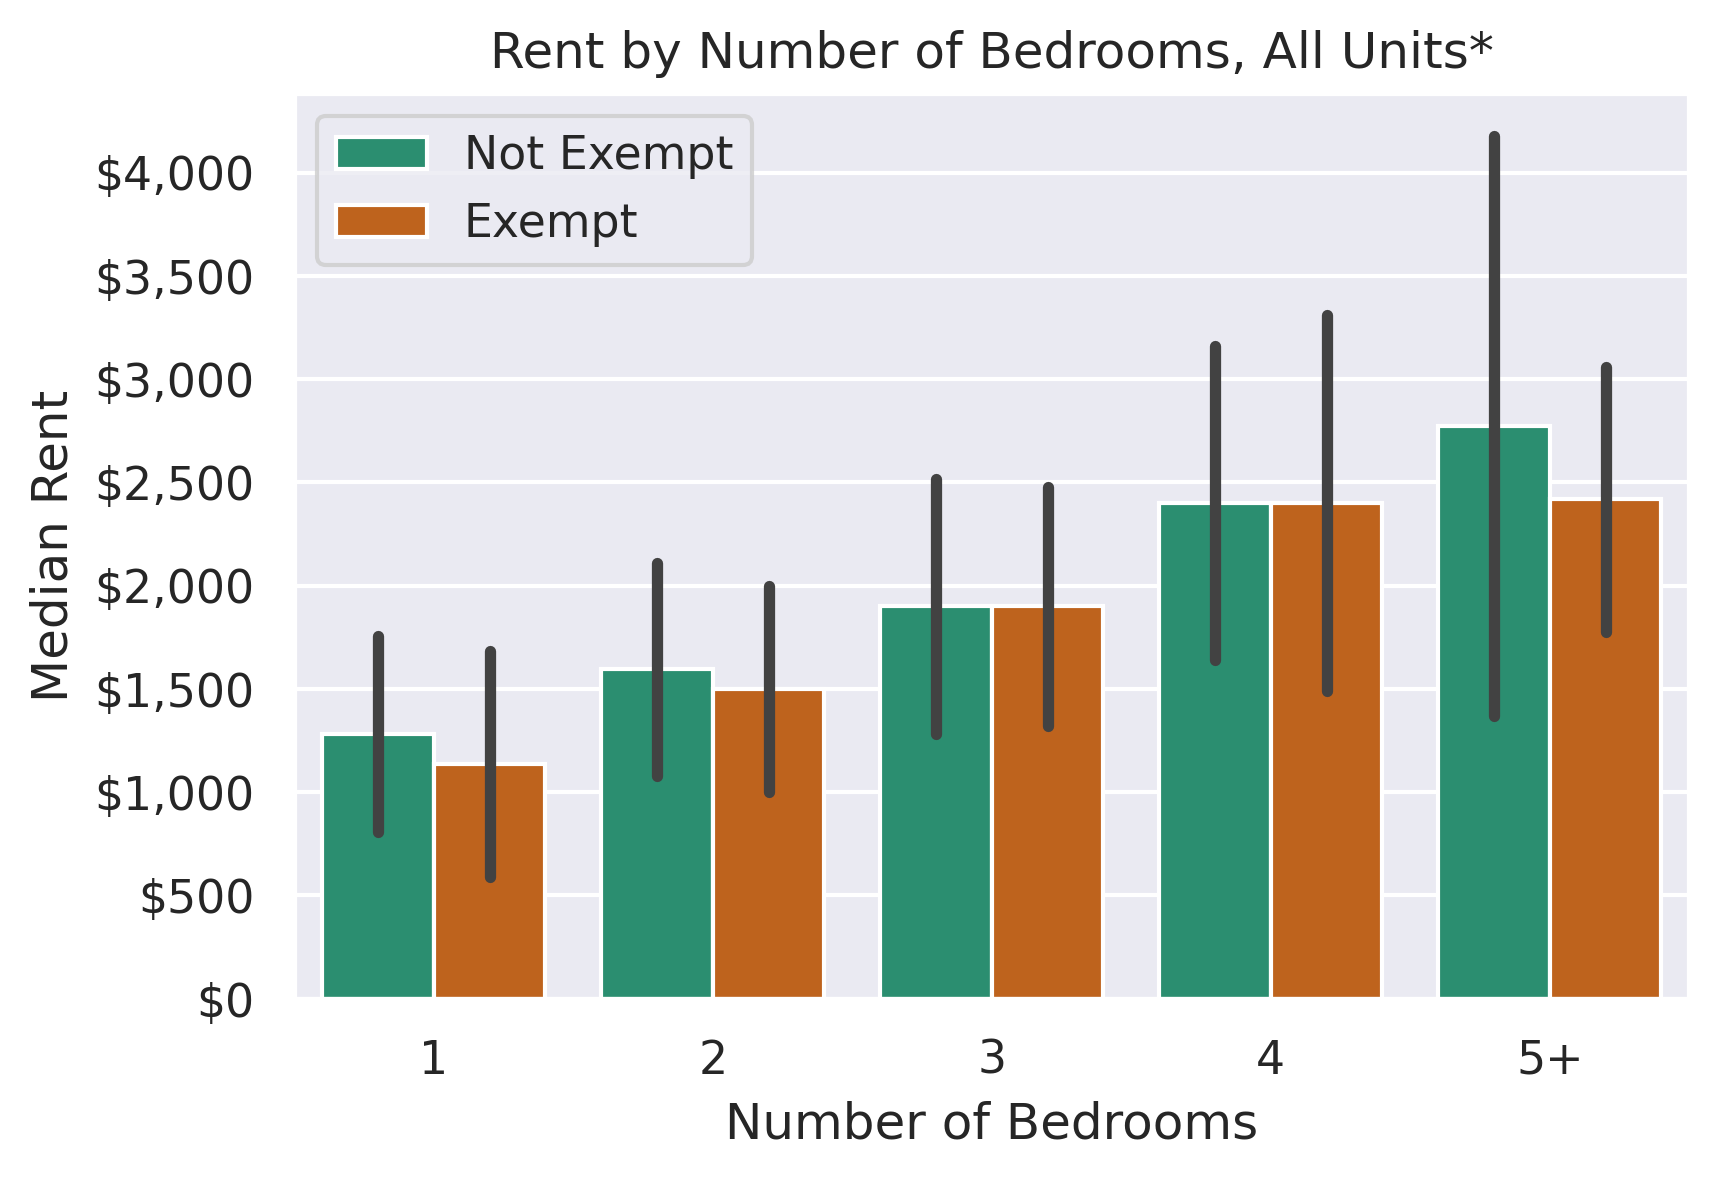

In [6]:
ax = sns.barplot(
    data=df[~df["outlier"]].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt",
    estimator=np.median,
    errorbar='sd'
    )
ax.set_title("Rent by Number of Bedrooms, All Units*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '${:,}'.format(int(x))))
ax.set_ylabel("Median Rent")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title=None, handles=handles, labels=["Not Exempt", "Exempt"])

In [7]:
# median and standard deviation rent by number of bedrooms and exempt status
tab = pd.pivot_table(
    df[~df["outlier"]],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="CurrentRent1",
    aggfunc=[np.median, np.std]
    )
tab.columns = tab.columns.set_levels(["Median Rent", "Standard Deviation"], level=0)
tab.columns = tab.columns.set_levels(["Not Exempt", "Exempt"], level=1)
tab.columns.names = ["", ""]
tab.index.name = "Number of Bedrooms"
tab.style.format("${:,.0f}")

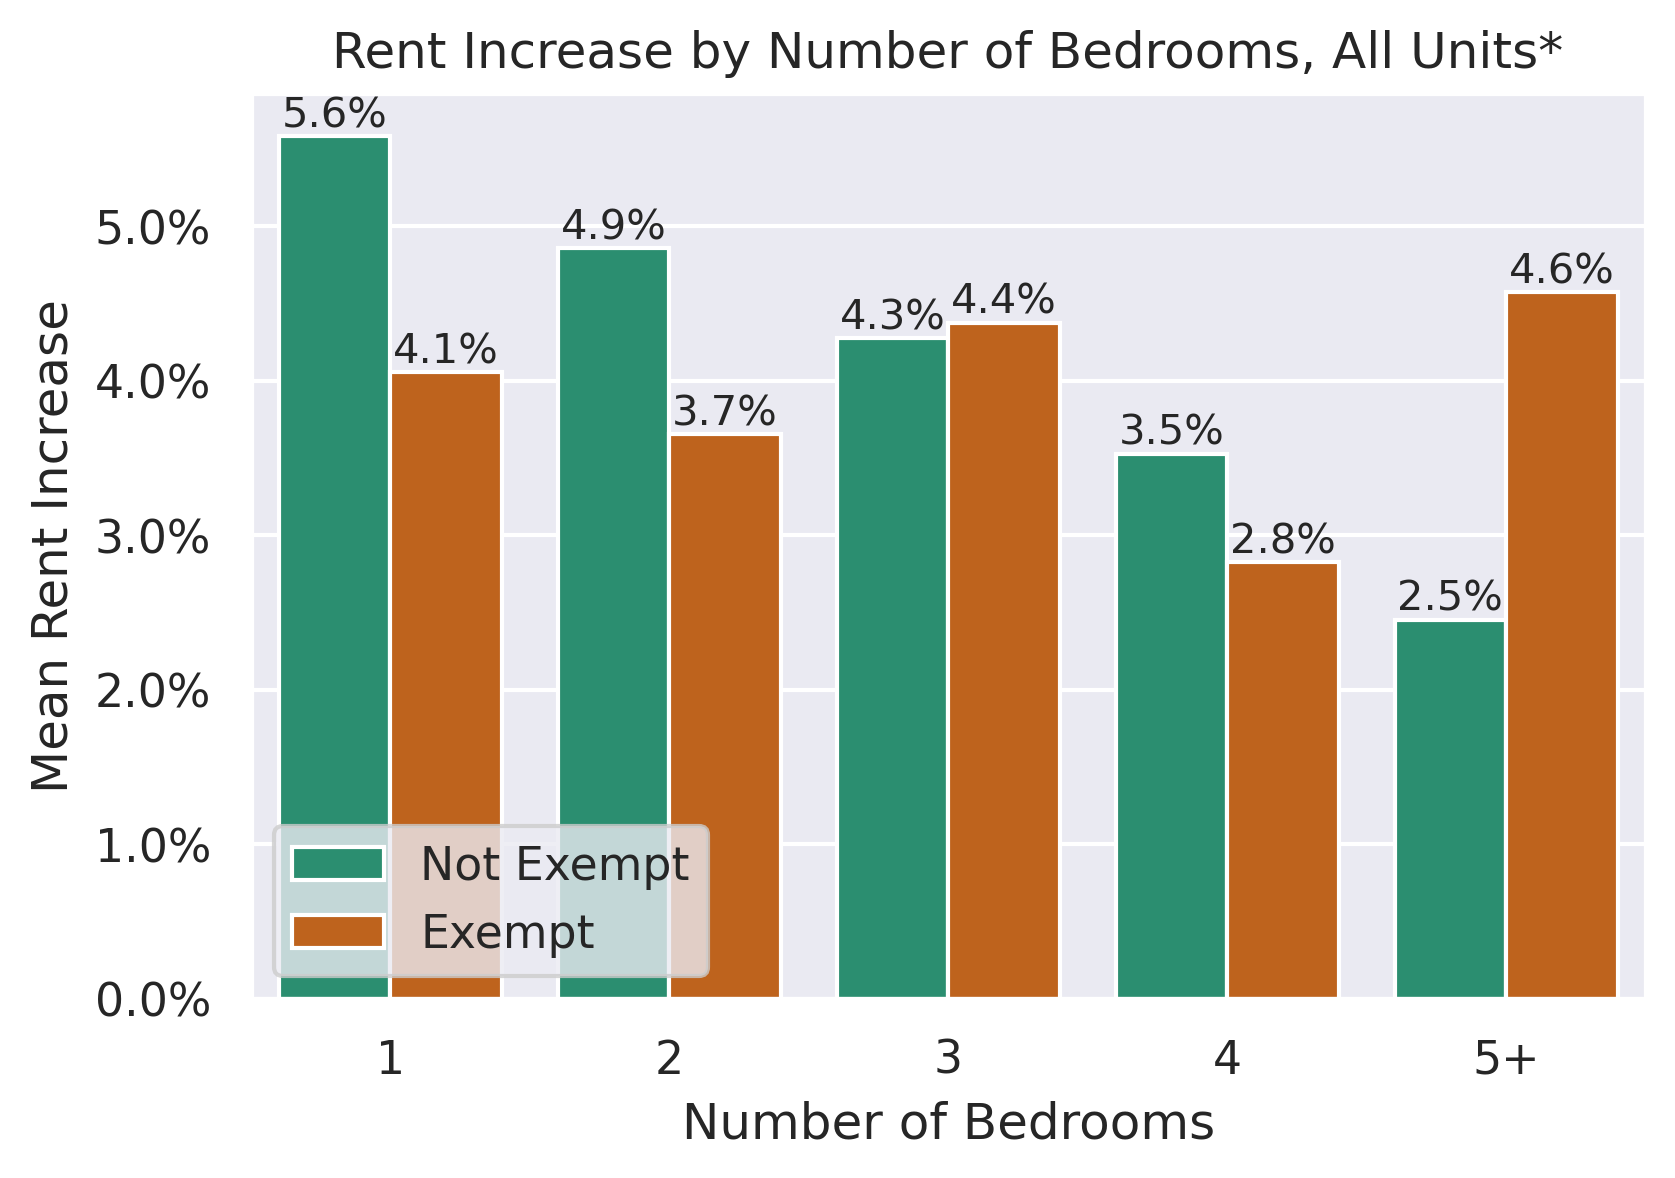

In [8]:
ax = sns.barplot(
    data=df[~df["outlier"]].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt",
    estimator=np.mean,
    errorbar=None
    )
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='%.1f%%',
        label_type='edge'
        )
ax.set_title("Rent Increase by Number of Bedrooms, All Units*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '{:.1f}%'.format(int(x))))
ax.set_ylabel("Mean Rent Increase")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title=None, handles=handles, labels=["Not Exempt", "Exempt"], loc='lower left')

In [9]:
# mean rent increase (percent) by number of bedrooms and exempt status
tab = pd.pivot_table(
    df[~df["outlier"]],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="Rent_Inc_percent",
    aggfunc=np.mean
    )
tab.columns = ["Not Exempt", "Exempt"]
tab.index.name = "Number of Bedrooms"
tab.style.format("{:.1f}%")

,Not Exempt,Exempt
Number of Bedrooms,,
1,5.6%,4.1%
2,4.9%,3.7%
3,4.3%,4.4%
4,3.5%,2.8%
5+,2.5%,4.6%


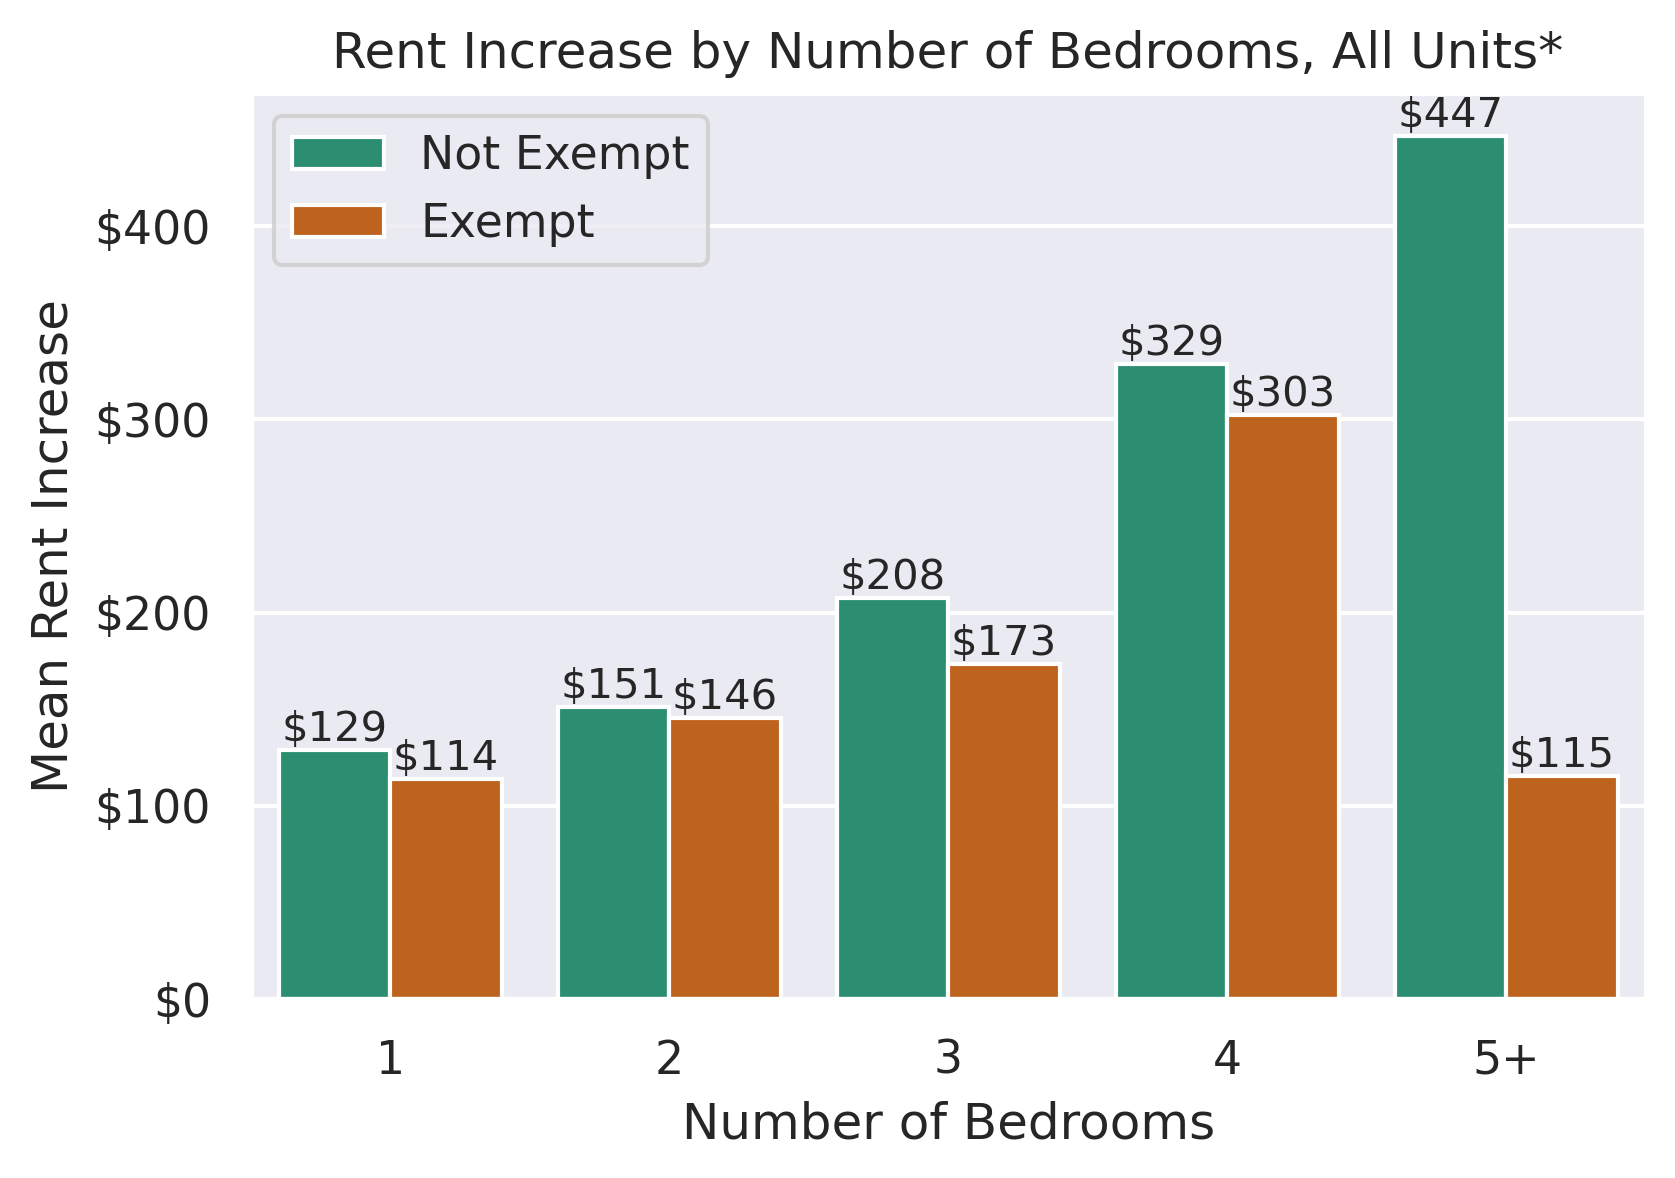

In [10]:
ax = sns.barplot(
    data=df[~df["outlier"]].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc",
    hue="exempt",
    estimator=np.mean,
    errorbar=None
    )
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='$%.0f',
        label_type='edge'
        )
ax.set_title("Rent Increase by Number of Bedrooms, All Units*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '${:,.0f}'.format(int(x))))
ax.set_ylabel("Mean Rent Increase")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title=None, handles=handles, labels=["Not Exempt", "Exempt"])

In [11]:
# mean rent increase (dollars) by number of bedrooms and exempt status
tab = pd.pivot_table(
    df[~df["outlier"]],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="Rent_Inc",
    aggfunc=np.mean
    )
tab.columns = ["Not Exempt", "Exempt"]
tab.index.name = "Number of Bedrooms"
tab.style.format("${:,.0f}")

,Not Exempt,Exempt
Number of Bedrooms,,
1,$129,$114
2,$151,$146
3,$208,$173
4,$329,$303
5+,$447,$115


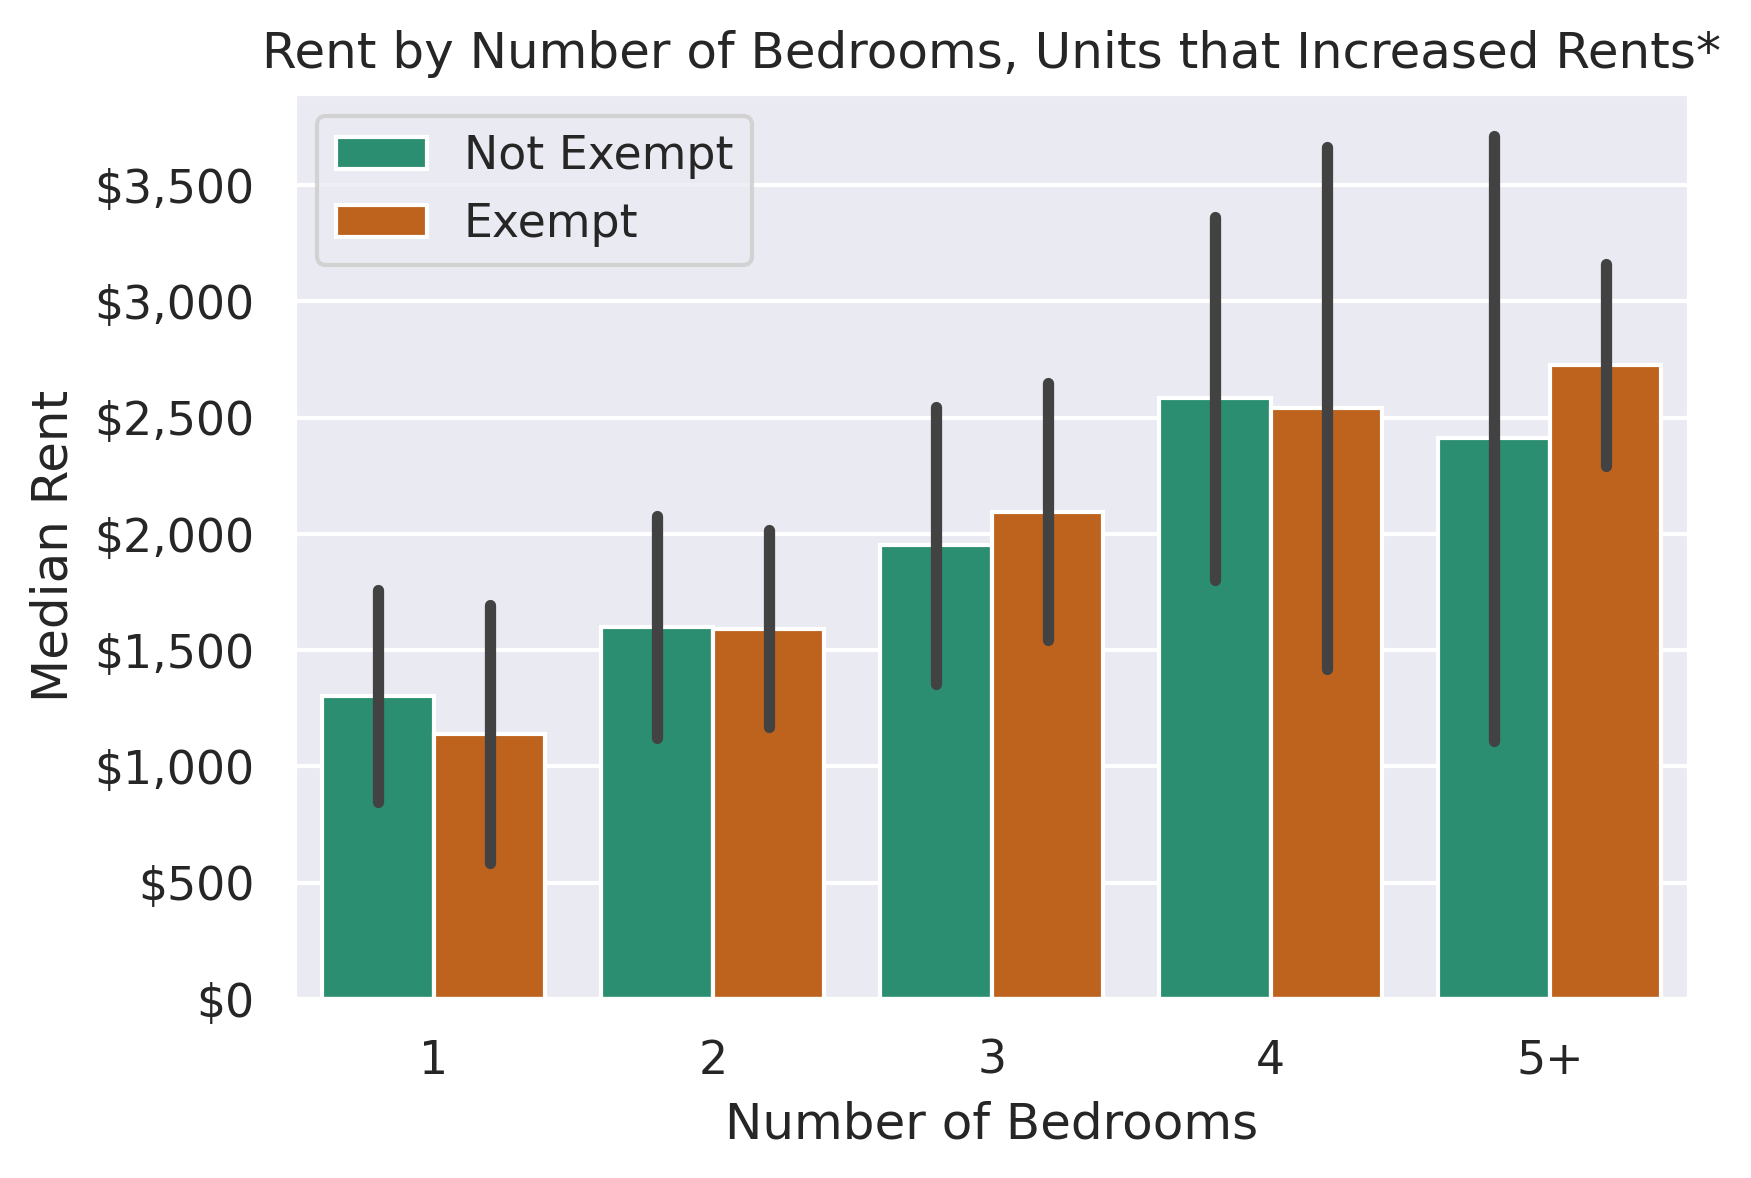

In [12]:
ax = sns.barplot(
    data=df[~df["outlier"] & (df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt",
    estimator=np.median,
    errorbar='sd'
    )
ax.set_title("Rent by Number of Bedrooms, Units that Increased Rents*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '${:,}'.format(int(x))))
ax.set_ylabel("Median Rent")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title=None, handles=handles, labels=["Not Exempt", "Exempt"])

In [13]:
# median and standard deviation rent by number of bedrooms and exempt status, only units that increased rents
tab = pd.pivot_table(
    df[~df["outlier"] & (df["Rent_Inc"] > 0)],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="CurrentRent1",
    aggfunc=[np.median, np.std]
    )
tab.columns = tab.columns.set_levels(["Median Rent", "Standard Deviation"], level=0)
tab.columns = tab.columns.set_levels(["Not Exempt", "Exempt"], level=1)
tab.columns.names = ["", ""]
tab.index.name = "Number of Bedrooms"
tab.style.format("${:,.0f}")

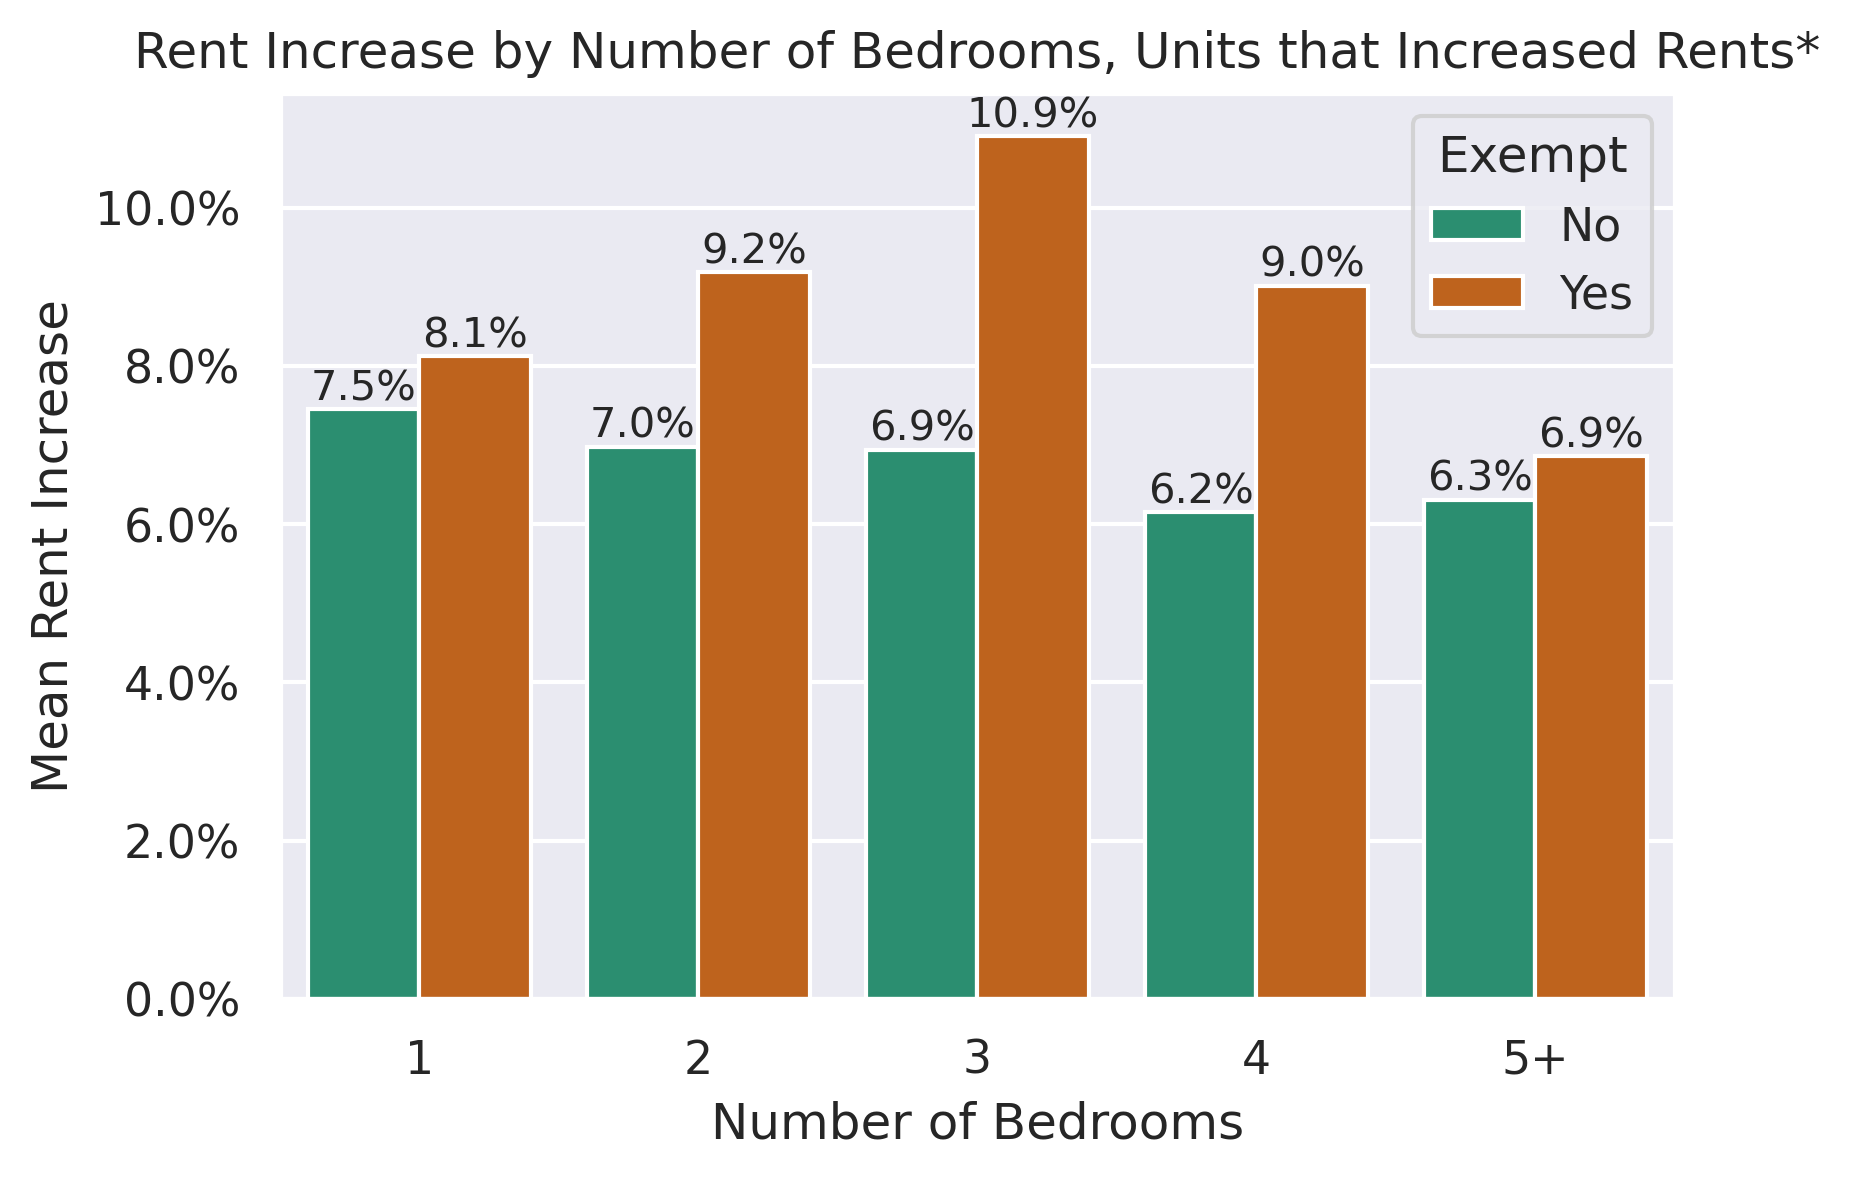

In [14]:
ax = sns.barplot(
    data=df[~df["outlier"] & (df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt",
    estimator=np.mean,
    errorbar=None
    )
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='%.1f%%',
        label_type='edge'
        )
ax.set_title("Rent Increase by Number of Bedrooms, Units that Increased Rents*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '{:.1f}%'.format(int(x))))
ax.set_ylabel("Mean Rent Increase")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title="Exempt", handles=handles, labels=["No", "Yes"])

In [15]:
# mean rent increase by number of bedrooms and exempt status, only units that increased rents
tab = pd.pivot_table(
    df[~df["outlier"] & (df["Rent_Inc"] > 0)],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="Rent_Inc_percent",
    aggfunc=np.mean
    )
tab.columns = ["Not Exempt", "Exempt"]
tab.index.name = "Number of Bedrooms"
tab.style.format("{:.1f}%")

,Not Exempt,Exempt
Number of Bedrooms,,
1,7.5%,8.1%
2,7.0%,9.2%
3,6.9%,10.9%
4,6.2%,9.0%
5+,6.3%,6.9%


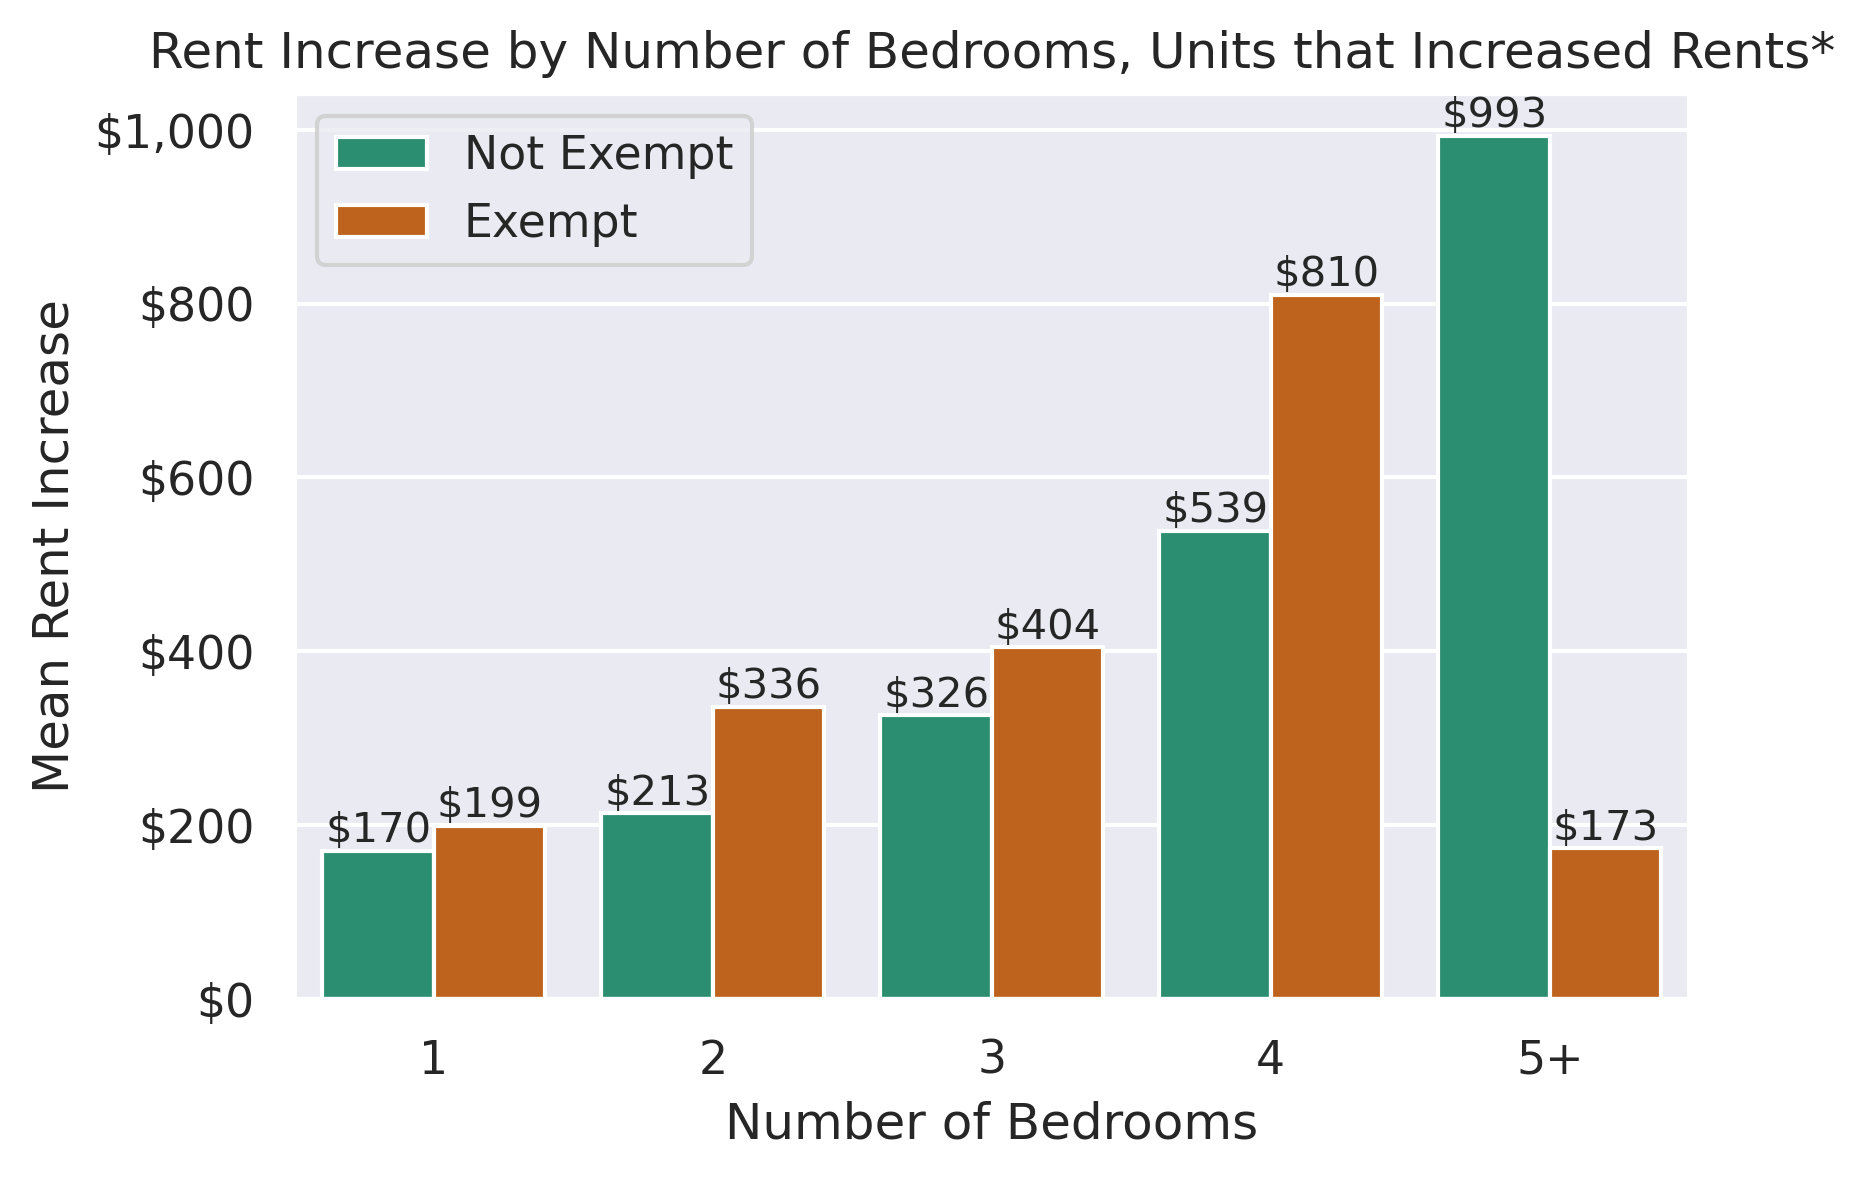

In [16]:
ax = sns.barplot(
    data=df[~df["outlier"] & (df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc",
    hue="exempt",
    estimator=np.mean,
    errorbar=None
    )
for bars in ax.containers:
    ax.bar_label(
        bars,
        fmt='$%.0f',
        label_type='edge'
        )
ax.set_title("Rent Increase by Number of Bedrooms, Units that Increased Rents*")
ax.set_xlabel("Number of Bedrooms")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '${:,.0f}'.format(int(x))))
ax.set_ylabel("Mean Rent Increase")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title=None, handles=handles, labels=["Not Exempt", "Exempt"])

In [17]:
# mean rent increase (dollars) by number of bedrooms and exempt status, only units that increased rents
tab = pd.pivot_table(
    df[~df["outlier"] & (df["Rent_Inc"] > 0)],
    index="nbrBedRms_grouped",
    columns="exempt",
    values="Rent_Inc",
    aggfunc=np.mean
    )
tab.columns = ["Not Exempt", "Exempt"]
tab.index.name = "Number of Bedrooms"
tab.style.format("${:,.0f}")

,Not Exempt,Exempt
Number of Bedrooms,,
1,$170,$199
2,$213,$336
3,$326,$404
4,$539,$810
5+,$993,$173


# Overall Rent Statistics (Outliers Included)
Code for these charts is included for completeness only and should not be used in subsequent analysis.

In [ ]:
ax = sns.barplot(
    data=df.sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt"
    )
ax.set_title("Rents by Number of Bedrooms, All Registered Units")

In [ ]:
ax = sns.barplot(
    data=df.sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt"
    )
ax.set_title("Rent Increase Percentages by Number of Bedrooms, All Registered Units")

In [ ]:
ax = sns.barplot(
    data=df[df["Rent_Inc"] > 0].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt"
    )
ax.set_title("Rents by Number of Bedrooms, Only Units that Increased Rents")

In [ ]:
ax = sns.barplot(
    data=df[(df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt"
    )
ax.set_title("Rents Increase Percentages by Number of Bedrooms, Only Units that Increased Rents")